In [1]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 
 
(3000, 28, 28)

(3000, 28, 28)


(3000, 28, 28)

In [3]:
print(x_train.shape)
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)
 
(3000, 784) 

(3000, 28, 28)
(3000, 784)


(3000, 784)

C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.366180
[t-SNE] KL divergence after 1000 iterations: 1.271638


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

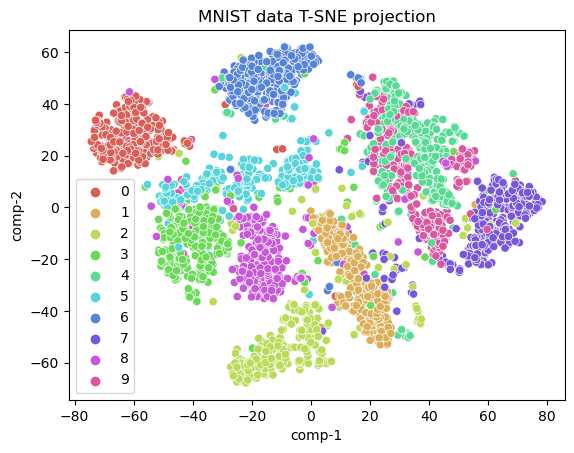

In [4]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

In [5]:
def scale_to_01_range(x):
    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.361679
[t-SNE] KL divergence after 1000 iterations: 1.276864


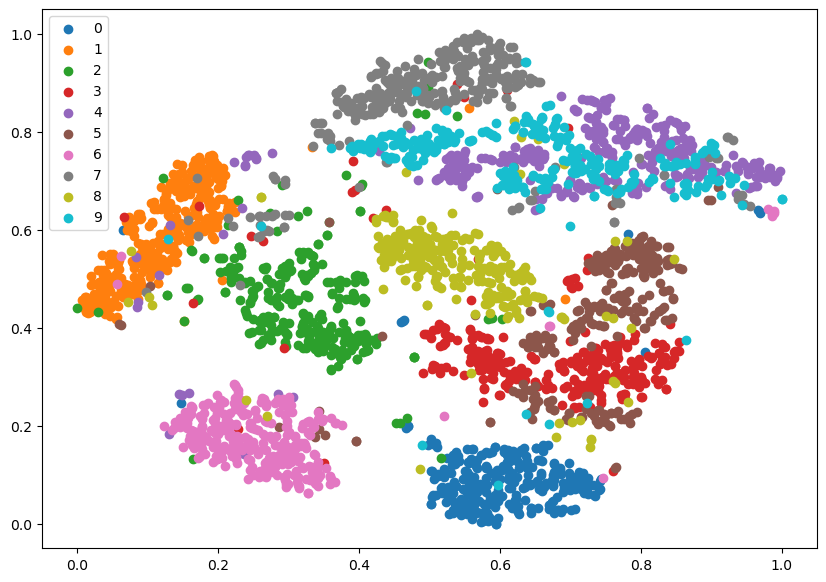

In [11]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)#, perplexity=50, learning_rate=100, n_iter=2500)
z = tsne.fit_transform(x_mnist)
tx = z[:, 0]
ty = z[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
for label in range(0,10):
    indices = [i for i, l in enumerate(y_train) if l == label]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, label=label)
ax.legend(loc='best')
plt.show()

C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\davis\anaconda3\envs\venv-graphs\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.246338
[t-SNE] KL divergence after 1000 iterations: 1.095586


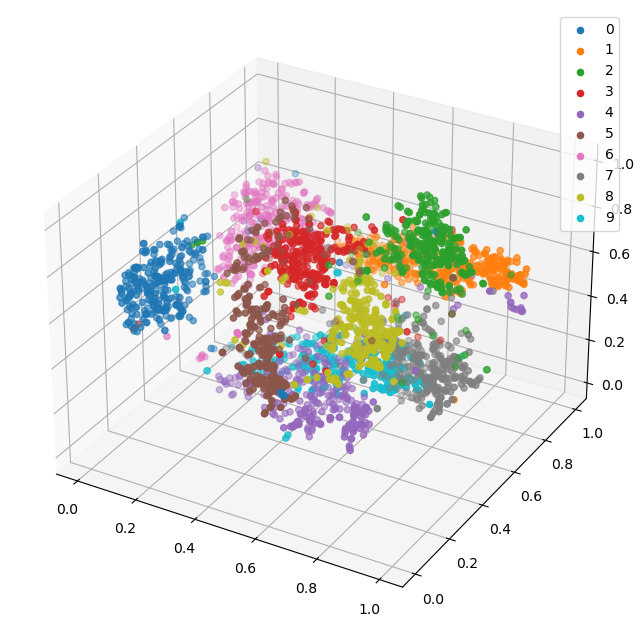

In [14]:
tsne = TSNE(n_components=3, verbose=1, random_state=42)#, perplexity=50, learning_rate=100, n_iter=2500)
z = tsne.fit_transform(x_mnist)
tx = z[:, 0]
ty = z[:, 1]
tz = z[:, 2]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
tz = scale_to_01_range(tz)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
for label in range(0,10):
    indices = [i for i, l in enumerate(y_train) if l == label]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    current_tz = np.take(tz, indices)
    ax.scatter(current_tx, current_ty, current_tz, label=label)
ax.legend(loc='best')
plt.show()